In [6]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.special
sns.set(style="ticks")
import statsmodels.api as sm

%matplotlib inline
plt.rc('text',usetex=True)
plt.rc('lines',linewidth=1)
plt.rc('legend',fontsize=10)
plt.rc('mathtext',fontset='cm')
plt.rc('font',**{'family':'serif','serif':['Times New Roman'],'size':10})



In [7]:
def V(x):
  return x**2

def psit(x,alpha):
  return np.exp(-alpha*x*x)

def lappsit(x,alpha): #return d^2 Psi /dx^2 * Psi^-1
  return ((2*alpha*x)**2-2*alpha)  #*psit(x,alpha)

def energy(x,alpha):
  return -lappsit(x,alpha)+V(x)


In [8]:

def sample(alpha,n=500,nstep=150,tau=0.1):
  """Generate a set of n configurations destributed according to psit**2"""  
  stau=np.sqrt(tau)
  x=np.zeros(n)
  psiold=psit(x,alpha)

  for i in range(0,nstep):
    xnew=x+stau*np.random.randn(n)
    psinew=psit(xnew,alpha)
    accept= psinew**2/psiold**2 + np.random.rand(n) > 1.0
    x[accept]=xnew[accept]
    psiold[accept]=psinew[accept]
    #print(x)
  return x  



/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


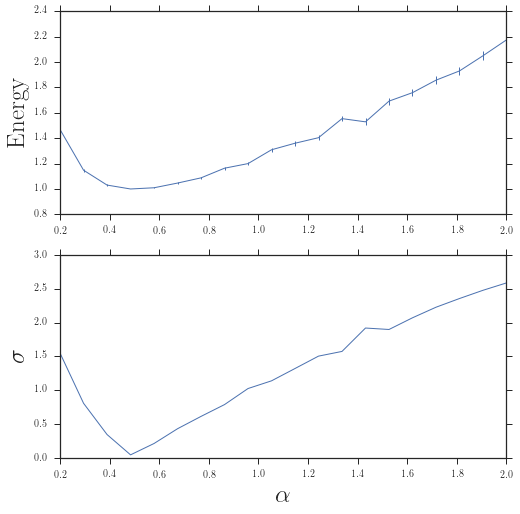

In [5]:
alphas=np.linspace(0.2,2.0,20) #How dense we'd like to sample alphas
npts=5000 #this affects how accurate the Monte Carlo integration is
enavg=[]
enstd=[]

#Variational minimization
for alpha in alphas:
  x=sample(alpha,n=npts) 
  en=energy(x,alpha)
  enavg.append(np.average(en))
  enstd.append(np.std(en))

fig,axes=plt.subplots(2,1,figsize=(8,8))
axes[0].errorbar(alphas,enavg,enstd/np.sqrt(npts))
axes[1].plot(alphas,enstd)
axes[1].set_xlabel(r"$\alpha$",fontsize=25)
axes[0].set_ylabel("Energy",fontsize=25)
axes[1].set_ylabel(r"$\sigma$",fontsize=25)